In [1]:
import numpy as np
import cv2
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array, load_img

In [30]:
import tensorflow as tf

In [2]:
dir="D:\sem_7\Project\\aparna_Lavanya_project\\image_dataset"
import pathlib
dir=pathlib.Path(dir)

In [3]:
skin_dict={
    'bcc':list(dir.glob('bcc/*')),
    'bkl':list(dir.glob('bkl/*')),
    'akiec':list(dir.glob('akiec/*')),
    'df':list(dir.glob('df/*')),
    'mel':list(dir.glob('mel/*')),
    'nv':list(dir.glob('nv/*')),
    'vasc':list(dir.glob('vasc/*'))
}

In [4]:
skin_label={
    'bcc':0, 
    'bkl':1,
    'akiec':2,
    'df':3,
    'mel':4,
    'nv':5,
    'vasc':6
}


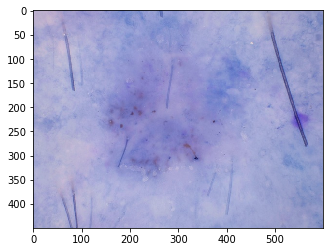

In [6]:
img=cv2.imread(str(skin_dict['bcc'][0]))
plt.imshow(img)

In [8]:
x=[]
y=[]
for name,img in skin_dict.items():
    for image in img:
        im=cv2.imread(str(image))
        #im=cv2.resize(im,(120,120))
        x.append(im)
        y.append(name)
        

In [9]:
print(len(x), len(y))

10975 10975


In [11]:
for i in range(len(y)):
    y[i]=skin_label[y[i]]

In [12]:
x=np.array(x)
y=np.array(y)


c:\users\k s l aparna\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.


In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.2,random_state=42)


In [15]:
len(x_test)
print(len(x_train))

8780


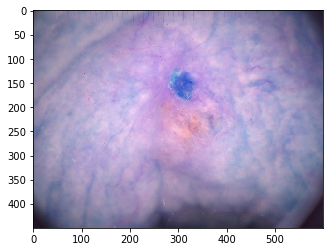

In [18]:
plt.imshow(x_train[0])

In [33]:
from tensorflow import keras 
from tensorflow.keras import layers
from tensorflow.keras import datasets, layers, models

In [37]:
model=models.Sequential([
layers.Conv2D(32,3,padding="same",activation='relu'),
layers.MaxPooling2D(),
layers.Conv2D(32,3,padding="same",activation='relu'),
layers.MaxPooling2D(),
layers.Conv2D(64,3,padding="same",activation='relu'),
layers.MaxPooling2D(),
layers.Flatten(),
layers.Dense(128,activation='relu'),
layers.Dense(3,activation='softmax')
])
model.compile(optimizer='adam',
loss='sparse_categorical_crossentropy',
metrics=['accuracy']
)
model.fit(x_train,y_train,epochs=10)

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type numpy.ndarray).